# Task 1 : Prediction Using SuperVised ML

# Name: Vidhyesh Pophalkar 

In [2]:
# Task: To predict the percentage of any student based on the no. of hrs studied using simple linear regression

In [35]:
# importing all libraries that are required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [36]:
# reading data from remote link
url = "http://bit.ly/w-data"
sdata = pd.read_csv(url)
print("Data Is Getting Imported")

Data Is Getting Imported


# Information about the data

In [4]:
# getting the info about the dataset
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
sdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# the first 10 entries in the dataset
sdata.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [37]:
# Checking for missing values
sdata.isna().any().any()

False

Good,So there are no missing values in this dataset.

Plotting the data on a graph to see if any relationship exists between the 2 vars.

# Plot the Data

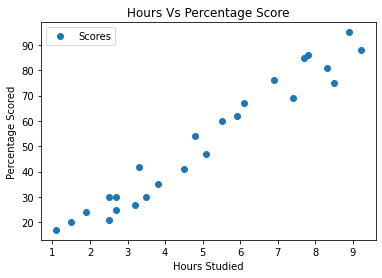

In [38]:
# Plotting the data
# since hours studied is the indep var,it will be x and score is dependent so it will be y
sdata.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [39]:
sdata.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above graph we can clearly see that there is a +ve linear relation between the 2 vars ie as hours studied increases/decreases,percentage score also increases/decreases.

# Preparing the Data 

In [9]:
# in the next step we divide the dataset into attributes(input) and labels(output) by extracting the data from our sdata 
# dataframe
# Attributes ie input Var X
X = sdata.iloc[:,:-1].values     # grab everything except the score coln

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
# labels ie output var Y
y = sdata.iloc[:,1].values  # grab everything except the hours coln

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the Data

In [13]:
# now we split the data into training and test sets by using scikit_learn's bulit in train_test_split method:
# importing the train_test_split method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)  # train size:80 and test size:20
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


# Training the Algorithm

In [14]:
# Now we will train the algorithm 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Training Done")

Training Done


# Plotting the Regression line of best fit

In [15]:
# plotting the regression line
line = regressor.coef_*X+regressor.intercept_

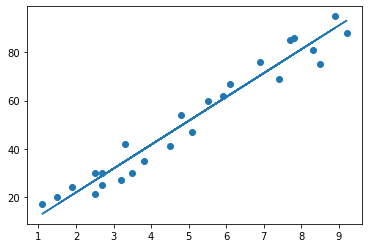

In [16]:
# plotting for test data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Making Predictions

Now that we have trained the algorithm,we will make predictions.

In [17]:
print(X_test) # test data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
y_pred = regressor.predict(X_test) # predicted scores

In [43]:
# comparing actual vs predicted
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

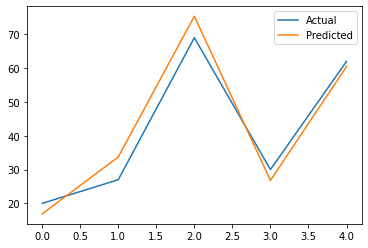

In [44]:
df.plot()

In [25]:
# what will be the predicted score if a student studies for 9.25 hrs/day?
hours = np.array(9.25).reshape(1,-1)
hours

array([[9.25]])

In [26]:
my_pred = regressor.predict(hours)

In [27]:
my_pred

array([93.69173249])

In [33]:
print(f"The No. of hrs={hours[0][0]}")
print(f"The Predicted score is:{my_pred[0]}")

The No. of hrs=9.25
The Predicted score is:93.69173248737539


# Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [34]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
